####  [OpenCV - 채널 분리 & 병합]

- 채널 분리
    - 함수: cv2.split(이미지로우데이터)
    - 결과: 튜플 타입에 분리된 채널 데이터 반환

- 채널 병합
    - 함수: cv2.merge(채널데이터, 채널데이터, 채널데이터)
    - 결과: 합쳐진 이미지 로우 데이터

- **주의 : opencv 한글 미지원! 경로, 파일명 한글 사용 xxx**

[1] 모듈 로딩 및 데이터 준비 <hr>

In [15]:
# 이미지 처리 모듈
import cv2

# 시각화 모듈
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [16]:
# 이미지 파일
IMG_FILE = '../Data/Image/cat_02.jpg'

[2] 이미지 로딩 및 정보 확인 <hr>

In [17]:
ORG_IMG = cv2.imread(IMG_FILE)  # 컬러
GRAY_IMG = cv2.imread(IMG_FILE, cv2.IMREAD_GRAYSCALE)

In [18]:
# 정보 확인
print(f'[원본 이미지 데이터]\n 형태: {ORG_IMG.shape}, 차원: {ORG_IMG.ndim}, 사이즈: {ORG_IMG.size}')
print(f'[그레이스케일 이미지 데이터]\n 형태: {GRAY_IMG.shape}, 차원: {GRAY_IMG.ndim}, 사이즈: {GRAY_IMG.size}')

[원본 이미지 데이터]
 형태: (371, 261, 3), 차원: 3, 사이즈: 290493
[그레이스케일 이미지 데이터]
 형태: (371, 261), 차원: 2, 사이즈: 96831


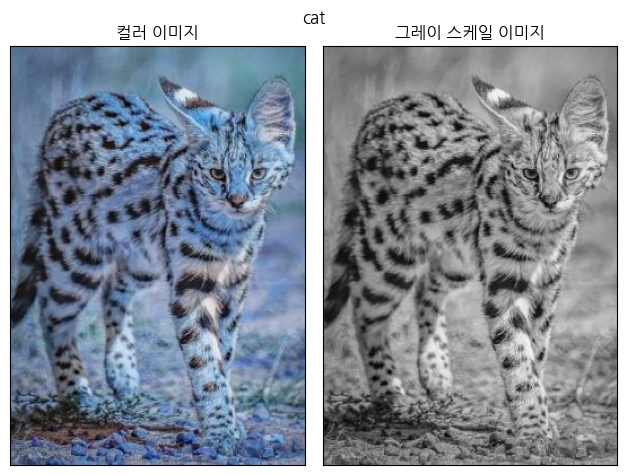

In [19]:
# 이미지 시각화
fig, axes = plt.subplots(1, 2, sharey=True)

# 컬러 이미지
axes[0].imshow(ORG_IMG)
axes[0].set_title('컬러 이미지')
axes[0].set_xticks([])   
axes[0].set_yticks([])  

# 그레이스케일 이미지
axes[1].imshow(GRAY_IMG, cmap='gray') 
axes[1].set_title('그레이 스케일 이미지')
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.suptitle("cat")
plt.tight_layout()
plt.show()

[3] 이미지 채널 분리 <HR>


In [20]:
# =====================================================
# [3-1] oencv의 split()함수 사용
# =====================================================
# - packing 방식(b, g, r)
channels = cv2.split(ORG_IMG)
print(f"channels : {len(channels)}개 {type(channels[0])}")

# - unpacking 방식
b, g, r = cv2.split(ORG_IMG)
print(f"b channels : {type(b)}, {b.shape}")
print(f"g channels : {type(g)}, {g.shape}")
print(f"r channels : {type(r)}, {r.shape}")

channels : 3개 <class 'numpy.ndarray'>
b channels : <class 'numpy.ndarray'>, (371, 261)
g channels : <class 'numpy.ndarray'>, (371, 261)
r channels : <class 'numpy.ndarray'>, (371, 261)


In [21]:
# 채널별 이미지 출력
cv2.imshow("Blue Channel", b)
cv2.imshow("Blue Channel", g)
cv2.imshow("Blue Channel", r)

# - 무한대기 중 어떤  키든 입력 시 모든창 닫기
cv2.waitKey()
cv2.destroyAllWindows

<function destroyAllWindows>

In [22]:
# =====================================================
# [3-2] ndarray로 채널 분리
# =====================================================
print(f"shape => {ORG_IMG.shape}")  # (높이/행, 너비/열, 채널)

# 축변경(높이/행, 너비/열, 채널)        -> (채널, 행, 열)
# ndarray.shape(321, 380., 3)       -> 축0, 축1, 축2

ORG_IMG2 = ORG_IMG.transpose(2, 0, 1)
print(f"ORG_IMG2 shape => {ORG_IMG2.shape}")

shape => (371, 261, 3)
ORG_IMG2 shape => (3, 371, 261)


In [23]:
# b, g, r 채널 분리
blueArray = ORG_IMG2[0, :, :]
greenArray = ORG_IMG2[1]
redaArray = ORG_IMG2[2]

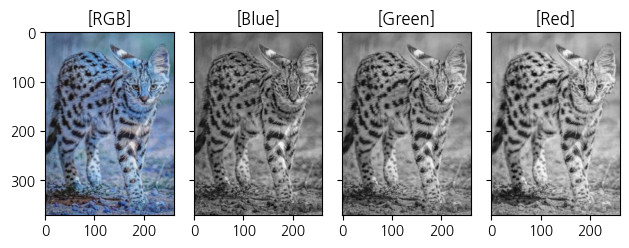

In [24]:
# 채널별 시각화
titles = ['RGB', 'Blue', 'Green', 'Red']
rawImg = [ORG_IMG, ORG_IMG2[0], ORG_IMG2[1], ORG_IMG2[2]]

fig, axes = plt.subplots(1, 4, sharey=True)
for idx, ax in enumerate(axes):
    ax.imshow(rawImg[idx], cmap='gray')
    ax.set_title(f'[{titles[idx]}]')

plt.tight_layout()
plt.show()

[4] 이미지 데이터 병합 <hr>

In [25]:
img_rgb = cv2.merge((ORG_IMG2[0], ORG_IMG2[1], ORG_IMG2[2]))


cv2.imshow('[RGB IMAGE]', img_rgb)
cv2.waitKey()
cv2.destroyAllWindows()

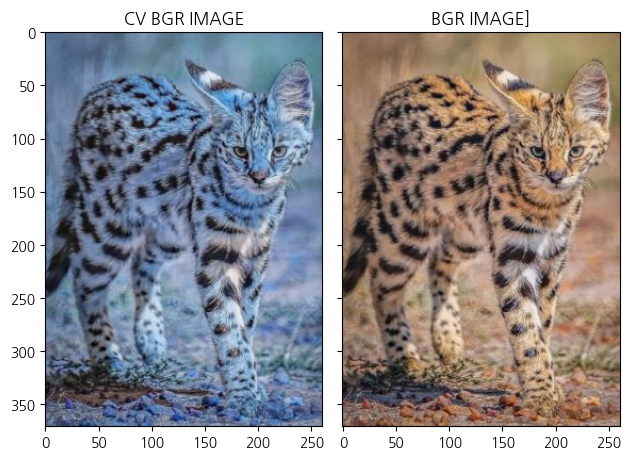

In [27]:
img_rgb = cv2.merge((ORG_IMG2[2], ORG_IMG2[1], ORG_IMG2[0]))

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(ORG_IMG)
ax1.set_title(f'CV BGR IMAGE')

ax2.imshow(img_rgb)
ax2.set_title(f'BGR IMAGE]')
plt.tight_layout()
plt.show()